In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
bank_raw = pd.read_csv("Dados\\bank-additional\\bank-additional-full.csv", delimiter=';')
bank_raw



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
bank_raw.shape

(41188, 21)

In [3]:
bank = bank_raw.copy()

In [4]:
# IDADES MÁXIMA E MINIMA
max_age = int(bank.age.max())
min_age = int(bank.age.min())
print(max_age, min_age)

98 17


In [6]:
idades = [min_age, 26]
bank = bank[(bank['age'] >= idades[0]) & (bank['age'] <= idades[1])]
bank.shape

(2364, 21)

In [7]:
bank_raw_target_perc = bank_raw.y.value_counts(normalize = True).to_frame()*100
bank_raw_target_perc = bank_raw_target_perc.sort_index()
bank_raw_target_perc

,y
no,88.734583
yes,11.265417


In [11]:
bank_target_perc = bank.y.value_counts(normalize = True).to_frame()*100
bank_target_perc = bank_raw_target_perc.sort_index()
bank_target_perc

,y
no,80.076142
yes,19.923858


Text(0.5, 1.0, 'Dados filtrados')

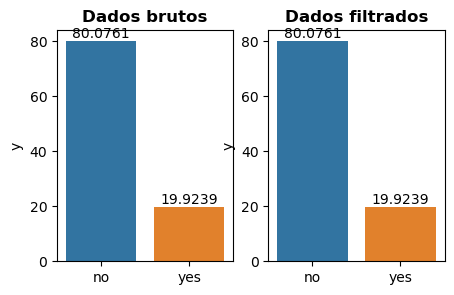

In [12]:
# PLOTS

fig, ax = plt.subplots(1, 2, figsize = (5,3))


sns.barplot(x = bank_raw_target_perc.index,
            y = 'y',
            data = bank_raw_target_perc,
            ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Dados brutos',
                fontweight ="bold")


sns.barplot(x = bank_target_perc.index,
            y = 'y',
            data = bank_target_perc,
            ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Dados filtrados',
                fontweight ="bold")